Importing libraries

In [16]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import altair as alt
alt.data_transformers.disable_max_rows() # Allows altair to use 5k + datasets
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import dataset and data cleaning

In [17]:
df = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project/spotify_App/tracks.csv')

In [18]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [19]:
df.shape

(586672, 20)

In [20]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [21]:
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
# New column in seconds, drop miliseconds
df['duration'] = round(df['duration_ms']/1000,0)
df.drop("duration_ms",axis=1, inplace=True)

In [24]:
#As some songs have more than one artist, I want to know how many artists have each song
df['artists_count'] = df['artists'].apply(lambda x: x.count(',') + 1 )

In [25]:
#Remove the Square Brackets from the artists

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

In [26]:
# I want to know in which year the song released
df['year'] = pd.DatetimeIndex(df['release_date']).year
#And for the decade: 
#                   create a decade column for each track based on the year of its release
df['Song_decade'] = None

df.loc[(df['year'] >= 1920) & (df['year'] < 1930), 'Song_decade'] = '1920s'
df.loc[(df['year'] >= 1930) & (df['year'] < 1940), 'Song_decade'] = '1930s'
df.loc[(df['year'] >= 1940) & (df['year'] < 1950), 'Song_decade'] = '1940s'
df.loc[(df['year'] >= 1950) & (df['year'] < 1960), 'Song_decade'] = '1950s'
df.loc[(df['year'] >= 1960) & (df['year'] < 1970), 'Song_decade'] = '1960s'
df.loc[(df['year'] >= 1970) & (df['year'] < 1980) , 'Song_decade'] = '1970s'
df.loc[(df['year'] >= 1980) & (df['year'] < 1990) , 'Song_decade'] = '1980s'
df.loc[(df['year'] >= 1990) & (df['year'] < 2000) , 'Song_decade'] = '1990s'
df.loc[(df['year'] >= 2000) & (df['year'] < 2010) , 'Song_decade'] = '2000s'
df.loc[(df['year'] >= 2010) & (df['year'] < 2020) , 'Song_decade'] = '2010s'
df.loc[(df['year'] >= 2020) & (df['year'] < 2030) , 'Song_decade'] = '2020s'

In [27]:
df.duplicated().any().sum() 
# no duplicates

0

In [28]:
## lets examine the dataset closely for duplicates
## examine the dataset for tracks with same name and artists, we can see that the dataset has some duplicate rows
## duplicates were not seen earlier because of a unique id column for each row
duplicate_names_artist = df[df.duplicated(['name', 'artists'])] 
# there are songs with same name and artists
duplicate_names_artist

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count,year,Song_decade
121,5cUFFY2Atw4QeFitueQCt2,El Huerfano - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.366,0.0749,7,...,0.99600,0.924000,0.1170,0.515,90.969,3,160.0,1,1922,1920s
230,5eXOIVUkW17FqnEoLR2wTX,Stardust,5,0,Louis Armstrong,['19eLuQmk9aCobbVDHc6eek'],1923,0.614,0.2980,3,...,0.97000,0.646000,0.0514,0.772,122.319,4,214.0,1,1923,1920s
398,2gFUqcLFUDVXcWmeKAOnGd,Pobre Cotorro - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1923-03-29,0.502,0.2980,5,...,0.99500,0.919000,0.2850,0.510,135.238,4,171.0,1,1923,1920s
511,4Q5I6riVFNV4mJaqSCmB0C,Basin Street Blues - rec. 1928,4,0,Louis Armstrong & His Hot Five,['0t4VVR2T9Sb0z3NdDdEU6S'],1923,0.604,0.2790,10,...,0.98600,0.237000,0.2750,0.594,123.271,4,207.0,1,1923,1920s
719,0OJgo5mwk8SirgbF8Ht4lA,Juan de los Santos Arena - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1924-03-29,0.408,0.1980,4,...,0.98000,0.900000,0.1140,0.150,120.807,4,144.0,1,1924,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586602,3fSZR3szZHnFQkpMFzwDNF,我在呢,45,0,TANK 呂建忠,['39LWbzZB6lcrRviPzrAVdZ'],2018-08-02,0.577,0.4470,1,...,0.59200,0.000000,0.1070,0.318,119.905,4,217.0,1,2018,2010s
586604,11DUHbs4Vu8M7ppePmszse,誰,45,0,Yo Lee,['1D2LuIU6rgg0MGa0l8wYJh'],2018-08-31,0.468,0.2600,1,...,0.69400,0.000000,0.1090,0.214,128.579,4,251.0,1,2018,2010s
586637,1HpzOCZbNWzxvvXfSGtSrX,Find U Again (feat. Camila Cabello),64,0,"Mark Ronson, Camila Cabello","['3hv9jJF3adDNsBSIQDqcjp', '4nDoRrQiYLoBzwC5Bh...",2019-05-30,0.605,0.6640,8,...,0.00548,0.000003,0.2040,0.164,103.997,4,176.0,2,2019,2010s
586646,0F2muCxmWhi7NfY9poM0KZ,至少我還記得 - 天堂的微笑插曲,44,0,Eric Chou,['5fEQLwq1BWWQNR8GzhOIvi'],2019-01-10,0.269,0.3680,10,...,0.72400,0.000003,0.1110,0.337,168.803,4,305.0,1,2019,2010s


In [29]:
#We'll drop duplicates based on two columns and keeping the first element
df.drop_duplicates(subset=['name', 'artists'], keep='first')

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count,year,Song_decade
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,...,0.674,0.744000,0.1510,0.1270,104.851,3,127.0,1,1922,1920s
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,...,0.797,0.000000,0.1480,0.6550,102.009,1,98.0,1,1922,1920s
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,...,0.994,0.021800,0.2120,0.4570,130.418,5,182.0,1,1922,1920s
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,...,0.995,0.918000,0.1040,0.3970,169.980,3,177.0,1,1922,1920s
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,...,0.989,0.130000,0.3110,0.1960,103.220,4,163.0,1,1922,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,0,阿YueYue,['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,...,0.785,0.000000,0.0648,0.2110,131.896,4,258.0,1,2020,2020s
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0,ROLE MODEL,['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,...,0.141,0.000297,0.0924,0.6860,150.091,4,153.0,1,2020,2020s
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,0,FINNEAS,['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,...,0.895,0.000150,0.0874,0.0663,145.095,4,188.0,1,2020,2020s
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,0,"Gentle Bones, Clara Benin","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,...,0.206,0.000003,0.3050,0.4380,90.029,4,142.0,2,2021,2020s


In [30]:
#df.to_csv('tracks_clean_kaggle.csv')

# EDA

In [31]:
df.corr()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count,year
popularity,1.000000,0.211749,0.186878,0.302178,0.015306,0.327001,-0.033652,-0.047415,-0.370723,-0.236403,-0.048735,0.004558,0.071223,0.086713,0.027640,-0.071291,0.590796
explicit,0.211749,1.000000,0.150216,0.123060,0.010933,0.134598,-0.051757,0.102251,-0.149001,-0.067510,-0.013113,-0.016551,0.005723,0.044442,-0.016748,0.058291,0.208475
danceability,0.186878,0.150216,1.000000,0.241464,0.018837,0.251394,-0.044726,0.199291,-0.242838,-0.225831,-0.106175,0.528136,-0.040896,0.146166,-0.120408,-0.076408,0.226596
energy,0.302178,0.123060,0.241464,1.000000,0.036303,0.764744,-0.065238,-0.053560,-0.715366,-0.195727,0.124636,0.372224,0.230006,0.188971,0.024785,-0.124285,0.460131
key,0.015306,0.010933,0.018837,0.036303,1.000000,0.027106,-0.129495,-0.001034,-0.027427,-0.006788,-0.006763,0.019998,0.004912,0.008871,0.004621,-0.006859,0.023678
loudness,0.327001,0.134598,0.251394,0.764744,0.027106,1.000000,-0.040456,-0.167140,-0.519423,-0.329255,0.029509,0.275416,0.189252,0.164376,0.000322,-0.143998,0.447057
mode,-0.033652,-0.051757,-0.044726,-0.065238,-0.129495,-0.040456,1.000000,-0.017992,0.058914,-0.010023,0.007025,0.011494,0.007877,-0.015899,-0.027609,-0.001230,-0.081315
speechiness,-0.047415,0.102251,0.199291,-0.053560,-0.001034,-0.167140,-0.017992,1.000000,0.069121,-0.102425,0.207062,0.046481,-0.086950,-0.114211,-0.125782,0.041720,-0.081996
acousticness,-0.370723,-0.149001,-0.242838,-0.715366,-0.027427,-0.519423,0.058914,0.069121,1.000000,0.204312,-0.004742,-0.180878,-0.195117,-0.173920,-0.064395,0.135638,-0.527429
instrumentalness,-0.236403,-0.067510,-0.225831,-0.195727,-0.006788,-0.329255,-0.010023,-0.102425,0.204312,1.000000,-0.038836,-0.175195,-0.055380,-0.042209,0.069321,0.082916,-0.221888


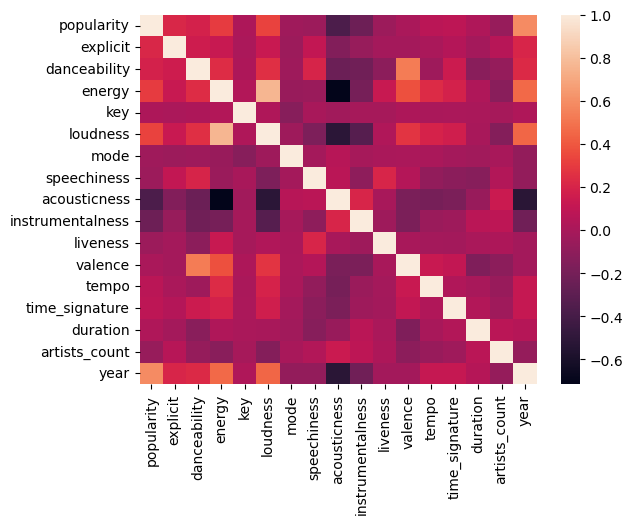

In [32]:
sns.heatmap(df.corr());

In [33]:
df_year_control = df.copy()
df_year_control = df_year_control[(df_year_control["year"] >= 1920) & (df_year_control["year"] < 2020)]
df_year_control = df_year_control.groupby("Song_decade").mean().reset_index()

df_year_control['acousticness'] = df_year_control['acousticness'] / df_year_control['acousticness'].max()
df_year_control['danceability'] = df_year_control['danceability'] / df_year_control['danceability'].max()
df_year_control['duration'] = df_year_control['duration'] / df_year_control['duration'].max()
df_year_control['energy'] = df_year_control['energy'] / df_year_control['energy'].max()
df_year_control['instrumentalness'] = df_year_control['instrumentalness'] / df_year_control['instrumentalness'].max()
df_year_control['liveness'] = df_year_control['liveness'] / df_year_control['liveness'].max()
df_year_control['speechiness'] = df_year_control['speechiness'] / df_year_control['speechiness'].max()
df_year_control['tempo'] = df_year_control['tempo'] / df_year_control['tempo'].max()
df_year_control['valence'] = df_year_control['valence'] / df_year_control['valence'].max()
df_year_control['popularity'] = df_year_control['popularity'] / df_year_control['popularity'].max()
df_year_control['loudness'] = df_year_control['loudness'] / df_year_control['loudness'].min()   #min because it is a negative value
df_year_control['year'] = df_year_control['year'].astype(str)
df_year_control.describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.475928,0.021751,0.898676,0.682385,5.174064,0.793582,0.684169,0.439136,0.663615,0.468723,0.949116,0.922728,0.947938,3.834042,0.917181,1.374634
std,0.372030,0.037577,0.081554,0.236588,0.110687,0.183035,0.040343,0.229039,0.282600,0.310574,0.029829,0.060940,0.040448,0.066318,0.075741,0.222387
min,0.029146,0.000719,0.781657,0.406992,4.999473,0.492440,0.603810,0.262032,0.314570,0.147215,0.904807,0.824858,0.876901,3.745408,0.753376,1.153997
25%,0.093956,0.000937,0.827710,0.456607,5.091876,0.714676,0.666145,0.318264,0.411689,0.218456,0.935089,0.876627,0.924462,3.783318,0.876217,1.197436
50%,0.536963,0.002420,0.915460,0.688451,5.165479,0.809979,0.697988,0.348363,0.646031,0.342835,0.946820,0.944591,0.948160,3.822374,0.932241,1.332094
75%,0.727929,0.026076,0.962401,0.863052,5.243436,0.950760,0.707955,0.447964,0.942663,0.699745,0.962481,0.962946,0.978713,3.881793,0.963575,1.460197
max,1.000000,0.117963,1.000000,1.000000,5.340026,1.000000,0.738145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.931427,1.000000,1.802760


In [34]:
df_year_control.describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.475928,0.021751,0.898676,0.682385,5.174064,0.793582,0.684169,0.439136,0.663615,0.468723,0.949116,0.922728,0.947938,3.834042,0.917181,1.374634
std,0.372030,0.037577,0.081554,0.236588,0.110687,0.183035,0.040343,0.229039,0.282600,0.310574,0.029829,0.060940,0.040448,0.066318,0.075741,0.222387
min,0.029146,0.000719,0.781657,0.406992,4.999473,0.492440,0.603810,0.262032,0.314570,0.147215,0.904807,0.824858,0.876901,3.745408,0.753376,1.153997
25%,0.093956,0.000937,0.827710,0.456607,5.091876,0.714676,0.666145,0.318264,0.411689,0.218456,0.935089,0.876627,0.924462,3.783318,0.876217,1.197436
50%,0.536963,0.002420,0.915460,0.688451,5.165479,0.809979,0.697988,0.348363,0.646031,0.342835,0.946820,0.944591,0.948160,3.822374,0.932241,1.332094
75%,0.727929,0.026076,0.962401,0.863052,5.243436,0.950760,0.707955,0.447964,0.942663,0.699745,0.962481,0.962946,0.978713,3.881793,0.963575,1.460197
max,1.000000,0.117963,1.000000,1.000000,5.340026,1.000000,0.738145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.931427,1.000000,1.802760


In [35]:
df_year_control.drop(["key","mode","year","artists_count","time_signature"],axis=1,inplace=True)
df_year_control = df_year_control.melt("Song_decade")

In [36]:
x =df.groupby("year")["acousticness","danceability","energy","valence"].mean().reset_index()
x = x[(x["year"] >= 1920) & (x["year"] <= 2020)]
x = pd.melt(x,id_vars=["year"])

alt.Chart(x).mark_line().encode(
    x='year',
    y='value',
    color='variable',
    strokeDash='variable',
).properties(width = 600)

alt.Chart(...)

In [37]:
decade = df[(df["year"] < 2020) & (df["year"] >= 1920)].groupby("Song_decade")["name"].count().reset_index()
alt.Chart(decade).mark_bar().encode(
    x = "Song_decade:O",
    
    y = alt.Y("name:Q",title="Number of songs"),
    color = alt.value("steelblue")
).properties(width = 600)

alt.Chart(...)

In [38]:
fig = px.line_polar(df_year_control, r="value",theta="variable",line_close=True,
             animation_frame="Song_decade",template="plotly_dark",range_r = (0,1))
fig.update_traces(fill='toself')
fig.update_layout(font_size=15)
fig.show()